<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/ccccccccc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf

In [10]:
 data = pd.read_csv('/content/spi1full.csv')
 data 

,date,spi,spi1,spi2,spi3,temp lag1,solar
0,01-01-1979,-1.019717,-1.289798,0.808844,-1.019717,36.610000,23.606018
1,01-02-1979,0.808844,-0.909221,-1.289798,0.808844,36.447433,23.687354
2,01-03-1979,-1.289798,-1.714817,-0.909221,-1.289798,32.640581,22.860871
3,01-04-1979,-0.909221,-0.889794,-1.714817,-0.909221,28.877733,19.364782
4,01-05-1979,-1.714817,0.889794,-0.889794,-1.714817,25.181000,14.713567
...,...,...,...,...,...,...,...
417,01-10-2013,-2.145778,0.143235,-2.145778,-2.145778,37.170677,21.818883
418,01-11-2013,-2.145778,0.317544,0.143235,-2.145778,39.723645,25.744232
419,01-12-2013,0.143235,0.546507,0.317544,0.143235,38.451286,23.033869
420,01-01-2014,0.317544,0.629004,0.546507,0.317544,32.790452,22.538527


In [13]:
plt.figure(figsize=(16,9))
fig = px.line(data, x=data.date, y='spi', title='spi')
fig.update_xaxes(rangeslider_visible=True)
fig.show() 


<Figure size 1152x648 with 0 Axes>

In [14]:
data.describe()

,spi,spi1,spi2,spi3,temp lag1,solar
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,-0.003563,-0.001159,0.000344,-0.003563,31.177071,19.238910
std,0.972634,0.971090,0.971854,0.972634,4.178850,3.227713
min,-2.156973,-2.156973,-2.156973,-2.156973,23.809267,9.905938
25%,-0.694336,-0.694336,-0.694336,-0.694336,27.552378,17.353171
50%,0.000000,0.000000,0.000000,0.000000,30.770039,19.468967
75%,0.694336,0.678003,0.694336,0.694336,34.677192,21.710972
max,2.156973,2.156973,2.156973,2.156973,40.718452,25.936360


In [15]:
data.drop_duplicates(subset=['date'], keep=False,inplace=True)
data.drop(['date'],axis=1,inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 421
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   spi        422 non-null    float64
 1   spi1       422 non-null    float64
 2   spi2       422 non-null    float64
 3   spi3       422 non-null    float64
 4   temp lag1  422 non-null    float64
 5   solar      422 non-null    float64
dtypes: float64(6)
memory usage: 23.1 KB


In [17]:
data.columns

Index(['spi', 'spi1', 'spi2', 'spi3', 'temp lag1', 'solar'], dtype='object')

In [19]:
data.select_dtypes('object').columns

Index([], dtype='object')

In [20]:
for i in data.select_dtypes('object').columns:
  le = LabelEncoder().fit(data[i])
  data[i] = le.transform(data[i])

In [21]:
data

,spi,spi1,spi2,spi3,temp lag1,solar
0,-1.019717,-1.289798,0.808844,-1.019717,36.610000,23.606018
1,0.808844,-0.909221,-1.289798,0.808844,36.447433,23.687354
2,-1.289798,-1.714817,-0.909221,-1.289798,32.640581,22.860871
3,-0.909221,-0.889794,-1.714817,-0.909221,28.877733,19.364782
4,-1.714817,0.889794,-0.889794,-1.714817,25.181000,14.713567
...,...,...,...,...,...,...
417,-2.145778,0.143235,-2.145778,-2.145778,37.170677,21.818883
418,-2.145778,0.317544,0.143235,-2.145778,39.723645,25.744232
419,0.143235,0.546507,0.317544,0.143235,38.451286,23.033869
420,0.317544,0.629004,0.546507,0.317544,32.790452,22.538527


In [22]:
validate = data[['spi', 'spi1', 'spi2', 'spi3', 'temp lag1', 'solar']].tail(10)
data.drop(data.tail(10).index,inplace=True)

In [23]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon

    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [25]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(data[['spi', 'spi1', 'spi2', 'spi3', 'temp lag1', 'solar']])
Y_data = Y_scaler.fit_transform(data[['spi']])

In [311]:
hist_window = 60
horizon =10 
TRAIN_SPLIT = 255
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon)
x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon)

In [ ]:
x_train

In [ ]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

In [297]:
batch_size = 60
buffer_size = 15

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [298]:
lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True), 
                               input_shape=x_train.shape[-2:]),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=horizon),
])
lstm_model.compile(optimizer='Adagrad', loss='mse')

In [ ]:
lstm_model.summary()

In [300]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [301]:
%%time
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = lstm_model.fit(train_data,epochs=5,steps_per_epoch=5,validation_data=val_data,validation_steps=50,verbose=1,callbacks=[es, rlr, mcp, tb])

Epoch 1/5
5/5 [==============================] - ETA: 0s - loss: 0.3049
Epoch 1: val_loss improved from inf to 0.27414, saving model to weights.h5
5/5 [==============================] - 20s 2s/step - loss: 0.3049 - val_loss: 0.2741 - lr: 0.0010
Epoch 2/5
5/5 [==============================] - ETA: 0s - loss: 0.3233
Epoch 2: val_loss improved from 0.27414 to 0.26773, saving model to weights.h5
5/5 [==============================] - 6s 2s/step - loss: 0.3233 - val_loss: 0.2677 - lr: 0.0010
Epoch 3/5
5/5 [==============================] - ETA: 0s - loss: 0.3134
Epoch 3: val_loss improved from 0.26773 to 0.26195, saving model to weights.h5
5/5 [==============================] - 7s 2s/step - loss: 0.3134 - val_loss: 0.2620 - lr: 0.0010
Epoch 4/5
5/5 [==============================] - ETA: 0s - loss: 0.2929
Epoch 4: val_loss improved from 0.26195 to 0.25685, saving model to weights.h5
5/5 [==============================] - 7s 2s/step - loss: 0.2929 - val_loss: 0.2568 - lr: 0.0010
Epoch 5/5
5

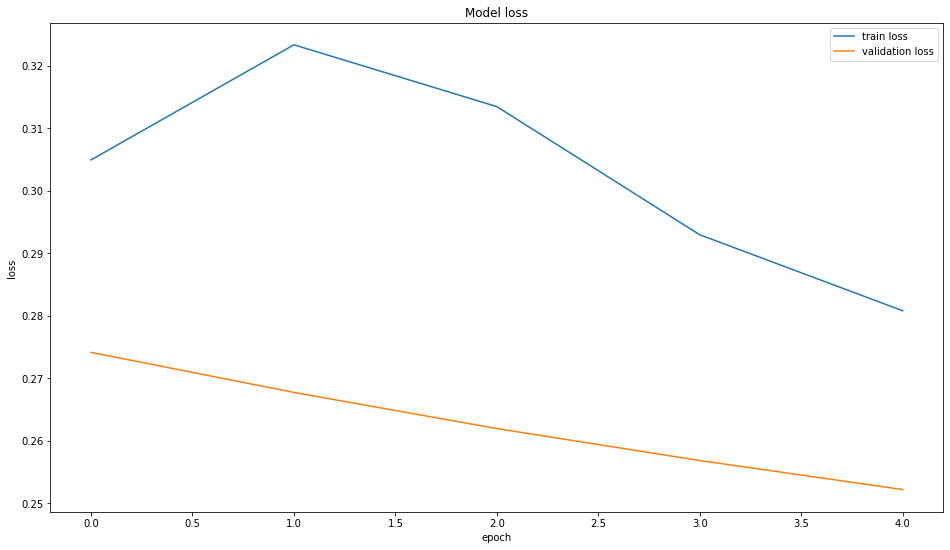

In [302]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [303]:
data.columns

Index(['spi', 'spi1', 'spi2', 'spi3', 'temp lag1', 'solar'], dtype='object')

In [304]:
data_val = X_scaler.fit_transform(data[['spi', 'spi1', 'spi2', 'spi3', 'temp lag1', 'solar']].tail(40))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

In [305]:
pred = lstm_model.predict(val_rescaled)
pred

array([[ 0.04886203,  0.06841034,  0.00197031,  0.00176864,  0.01896449,
         0.06650764,  0.04838366,  0.02909501,  0.14570503,  0.025193  ,
         0.02192958, -0.01059286,  0.02122791,  0.03110234,  0.01414462,
         0.00661321, -0.00406312,  0.03021733,  0.03020561,  0.05170209]],
      dtype=float32)

In [306]:
pred_Inverse = Y_scaler.inverse_transform(pred)

In [307]:
pred_Inverse

array([[-1.946185 , -1.8618547, -2.1484733, -2.1493433, -2.0751615,
        -1.8700628, -1.9482487, -2.0314589, -1.5284095, -2.048292 ,
        -2.06237  , -2.2026703, -2.065397 , -2.0227993, -2.095954 ,
        -2.1284442, -2.1745014, -2.0266173, -2.0266678, -1.9339331]],
      dtype=float32)

In [308]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [309]:
pred_Inverse[0]

array([-1.946185 , -1.8618547, -2.1484733, -2.1493433, -2.0751615,
       -1.8700628, -1.9482487, -2.0314589, -1.5284095, -2.048292 ,
       -2.06237  , -2.2026703, -2.065397 , -2.0227993, -2.095954 ,
       -2.1284442, -2.1745014, -2.0266173, -2.0266678, -1.9339331],
      dtype=float32)

In [310]:
timeseries_evaluation_metrics_func(validate['spi'],pred_Inverse[0])

Evaluation metric results:-


ValueError: ignored

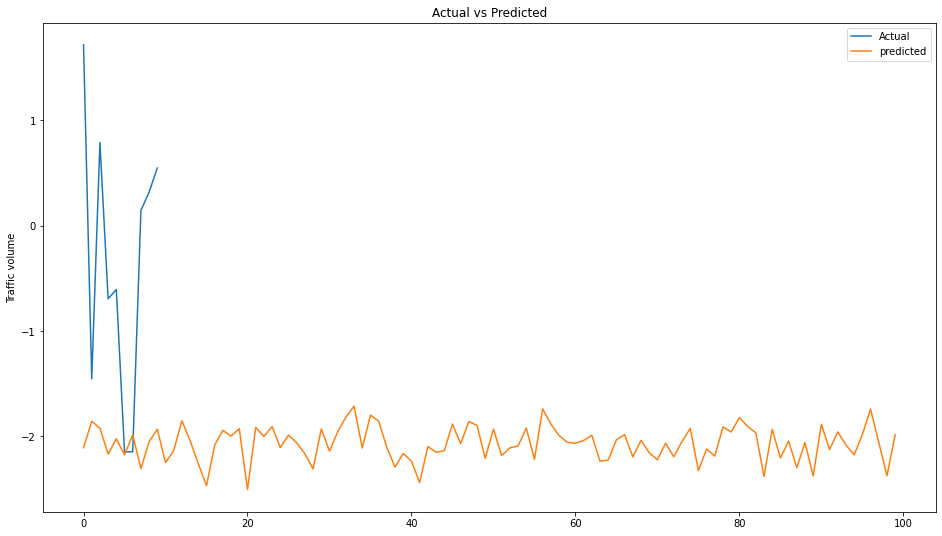

In [239]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['spi']))
plt.plot( list(pred_Inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Traffic volume")
plt.legend(('Actual','predicted'))
plt.show()